## 01. Import Libraries

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl
from sklearn.preprocessing import StandardScaler

## 02. Path Creation

In [10]:
data_path = r'/Users/renatabatista/Other Docs/Germany/CareerFoundry/Data Imersion/4. Python/26-05-2025 BR e-commerce'

## 03. Load Data 

In [13]:
df = pd.read_csv(os.path.join(data_path, '02 Data', 'Prepared Data', 'check_merge_orders_full.csv'), index_col = False)

## 04. Data Prep

In [21]:
df.dtypes

Unnamed: 0                         int64
order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_c

In [23]:
# Convert dates
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'], errors='coerce')
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'], errors='coerce')

# Create delivery delay column
df['delivery_delay_days'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days

In [25]:
df.dtypes

Unnamed: 0                                int64
order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp                 object
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
product_category_name                    object
product_name_lenght                     

## K-means only work with Numerical features

In [38]:
# Subset of numeric features
features = ['price','freight_value','product_weight_g','product_length_cm','product_height_cm','product_width_cm','payment_installments','payment_value','review_score','delivery_delay_days']

# Drop rows with missing values
df_cluster = df[features].dropna()

In [44]:
df_cluster.dtypes

price                  float64
freight_value          float64
product_weight_g       float64
product_length_cm      float64
delivery_delay_days      int64
dtype: object

## 05. Standardize 

In [51]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

## 06. Elbow Method

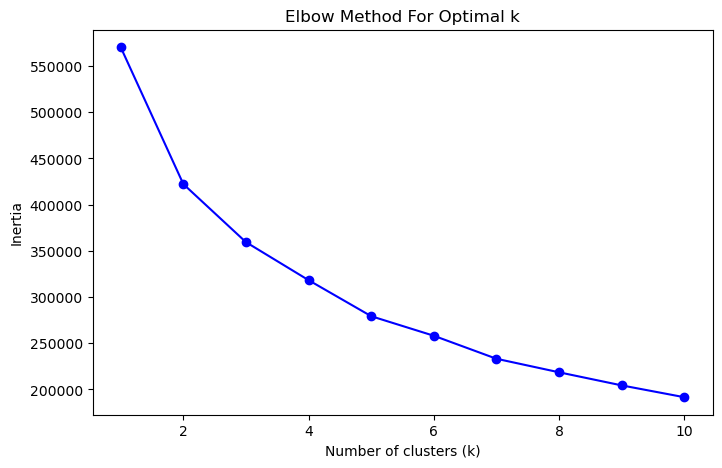

In [54]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow chart
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

## 07. Choose Optimal K

#### The “elbow” appears to occur at k = X, where the rate of decline in inertia slows down. 

#### This is typically chosen as the optimal number of clusters, as it balances model simplicity and explained variance.

## 08. Run K-Means Clustering

In [62]:
optimal_k = 3  

# Example, adjust based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(df_scaled)

## 09. Visualize the Clusters

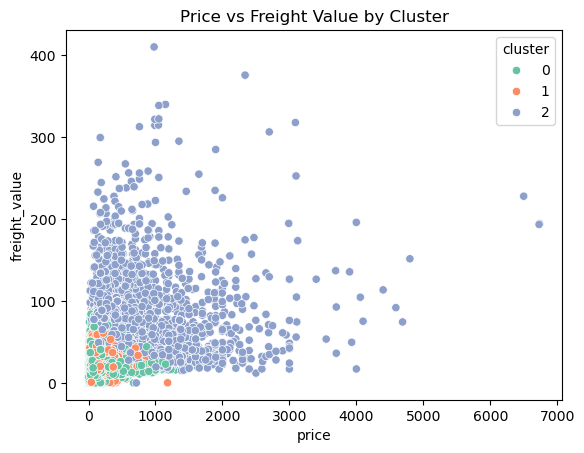

In [65]:
sns.scatterplot(data=df_cluster, x='price', y='freight_value', hue='cluster', palette='Set2')
plt.title('Price vs Freight Value by Cluster')
plt.show()

## 10. Analyze the Clusters

In [68]:
cluster_summary = df_cluster.groupby('cluster').mean().round(2)
print(cluster_summary)

          price  freight_value  product_weight_g  product_length_cm  \
cluster                                                               
0         91.36          16.46            830.70              22.70   
1        127.41          22.05           3876.46              50.35   
2        543.07          66.77          13703.48              50.86   

         delivery_delay_days  
cluster                       
0                     -12.15  
1                     -11.83  
2                     -11.58  


## Interpret

In a markdown cell, describe your findings:

 - Cluster 0 appears to consist of low-priced, lightweight products with minimal delivery delay.
 - Cluster 1 contains higher-priced, heavier products with longer delays.
 - Cluster 2 may represent mid-range products.

### These groupings suggest different logistics and customer segments, useful for targeting delivery or pricing strategies.

## 11. Conclu